## Análisis Exploratorio de Datos - Propensión de Compra

## Importación de librerías.

In [210]:
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,
                             accuracy_score, f1_score, recall_score)
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from itertools import product
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np
import re
from tabulate import tabulate
from sklearn.cluster import KMeans
import os
from urllib.parse import urlparse
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_score,
    recall_score,
)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from itertools import product
import joblib

## **Importación e información del dataframe.**

In [70]:
df = pd.read_csv('data/raw/Propensity.csv', delimiter=',', index_col=0)

In [71]:
# Número de filas y columnas
print(df.shape)  

(58049, 23)


In [72]:
# Primeras filas del DataFrame
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3


In [73]:

df.dtypes

PRODUCTO           object
TIPO_CARROCERIA    object
COMBUSTIBLE        object
Potencia           object
TRANS              object
FORMA_PAGO         object
ESTADO_CIVIL       object
GENERO             object
OcupaciOn          object
PROVINCIA          object
Campanna1          object
Campanna2          object
Campanna3          object
Zona_Renta         object
REV_Garantia       object
Averia_grave       object
QUEJA_CAC          object
COSTE_VENTA         int64
km_anno             int64
Mas_1_coche          bool
Revisiones          int64
Edad_Cliente        int64
Tiempo              int64
dtype: object

In [74]:
df.columns

Index(['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS',
       'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA',
       'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia',
       'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Mas_1_coche',
       'Revisiones', 'Edad_Cliente', 'Tiempo'],
      dtype='object')

### Descripción de las Variables del Dataset.

| **Variable**      | **Descripción** |
|------------------|------------------------------------------------|
| `CODE`          | Código único del cliente. |
| `PRODUCTO`      | Modelo de coche adquirido. |
| `TIPO_CARROCERIA` | Tipo de carrocería del coche (SUV, Sedán, etc.). |
| `COMBUSTIBLE`   | Tipo de combustible utilizado (Gasolina, Diésel, etc.). |
| `Potencia`      | Potencia del coche en caballos de fuerza. |
| `TRANS`         | Tipo de transmisión (Manual o Automática). |
| `FORMA_PAGO`    | Método de pago (Financiado o Contado). |
| `ESTADO_CIVIL`  | Estado civil del cliente al momento de la compra. |
| `GENERO`        | Género del cliente (Masculino o Femenino). |
| `OcupaciOn`     | Ocupación del cliente en el momento de la compra. |
| `PROVINCIA`     | Provincia de residencia del cliente. |
| `Campanna1`     | Si el cliente recibió un descuento por financiar (Sí/No). |
| `Campanna2`     | Si el cliente recibió un descuento por adquirir un seguro (Sí/No). |
| `Campanna3`     | Si el cliente recibió un descuento por extender la garantía (Sí/No). |
| `Zona_Renta`    | Nivel de renta promedio en la zona de residencia del cliente. |
| `REV_Garantia`  | Si el coche sigue en garantía. |
| `Averia_grave`  | Si el coche ha tenido una avería grave y de qué tipo. |
| `QUEJA_CAC`     | Si el cliente ha contactado con atención al cliente por alguna queja. |
| `COSTE_VENTA`   | Suma de descuentos aplicados en la venta. |
| `km_anno`       | Kilometraje medio recorrido por el coche al año. |
| `Mas_1_coche`   | Indica si el cliente ha comprado más de un coche. |
| `Revisiones`    | Número de revisiones pasadas del coche. |
| `Edad_Cliente`  | Edad actual del cliente. |
| `Tiempo`        | Años transcurridos entre compras de coches por el cliente. |



In [75]:
df.describe(include='all')

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
count,58049,58049,58049,58049,58049,58049,57159,57189,58049,58049,...,44871,58049,58048,58049,58049.000000,58049.000000,58049,58049.000000,58049.000000,58049.000000
unique,11,8,2,3,2,4,4,2,3,53,...,4,2,4,2,NaN,NaN,2,NaN,NaN,NaN
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,...,Alto,NO DATA,No,NO,NaN,NaN,False,NaN,NaN,NaN
freq,15993,23387,33085,39906,52969,30190,43529,40170,53262,10874,...,17152,32011,29935,36268,NaN,NaN,41107,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2540.125756,11805.893607,NaN,3.529587,47.351255,1.859119
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1603.556511,10205.363971,NaN,2.528413,11.239984,3.091309
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,18.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1595.000000,0.000000,NaN,1.000000,40.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2353.000000,11486.000000,NaN,3.000000,48.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3301.000000,17927.000000,NaN,5.000000,56.000000,4.000000


### **Limpieza de datos.**

El dataset cuenta con un total de 24 columnas que debemos analizar para determinar cuáles serán relevantes en nuestro estudio. Para ello, es importante comprender el significado de cada una de ellas y su posible impacto en el análisis.

#### Manejo de filas duplicadas.

En caso de haber filas duplicadas, deberemos de eliminar estas para que no afecten al análisis posterior.

In [76]:
df.duplicated().sum() # Columnas duplicadas

np.int64(144)

In [77]:
df.drop_duplicates(inplace=True)

#### Manejo de filas nulas.

In [78]:
df.isnull().sum() # Valores nulos

PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia               0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona_Renta         13064
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad_Cliente           0
Tiempo                 0
dtype: int64

In [79]:
df.shape[0]

57905

In [80]:
df.dropna(subset=['Averia_grave'], inplace=True)

In [81]:
# Rellenar valores faltantes con la moda
for i in ['ESTADO_CIVIL', 'GENERO']:
    df[i] = df[i].fillna(df[i].mode()[0])

### **Selección de variables categóricas y continuas.**


Para realizar correctamente un ánalisis de datos debemos de distinguir entre las variables categóricas, variables que representan diferentes categorías o grupos, y continuas, variables que pueden tomar cualquier valor dentro de un rango determinado.

In [82]:
v_continuas = []
v_categoricas = []

for col in df.columns:
    if df[col].dtype in ['int64', 'float64', 'bool']:  # Variables numéricas y booleanas como continuas
        v_continuas.append(col)
    else:
        v_categoricas.append(col)

print('Variables continuas:', ', '.join(v_continuas))
print('Variables categóricas:', ', '.join(v_categoricas))


Variables continuas: COSTE_VENTA, km_anno, Mas_1_coche, Revisiones, Edad_Cliente, Tiempo
Variables categóricas: PRODUCTO, TIPO_CARROCERIA, COMBUSTIBLE, Potencia, TRANS, FORMA_PAGO, ESTADO_CIVIL, GENERO, OcupaciOn, PROVINCIA, Campanna1, Campanna2, Campanna3, Zona_Renta, REV_Garantia, Averia_grave, QUEJA_CAC


Variables continuas (v_continuas):

Columnas numéricas (int64, float64), ya que representan cantidades medibles.
También incluyo las booleanas (bool), ya que pueden ser tratadas como binarias (0/1).

Variables categóricas (v_categoricas):

Columnas de tipo object, que son datos no numéricos como nombres de productos, tipo de combustible, etc.

#### Tratamiento de variables categóricas.

Para el posterior modelo de clasificación, necesitamos codificar nuestras variables object. Para ello, realizaremos una codificación ordinal que consiste en asignar valores enteros a las categorias basándose en su posición o jerarquía en los datos.

In [83]:
df[v_categoricas].nunique()

PRODUCTO           11
TIPO_CARROCERIA     8
COMBUSTIBLE         2
Potencia            3
TRANS               2
FORMA_PAGO          4
ESTADO_CIVIL        4
GENERO              2
OcupaciOn           3
PROVINCIA          53
Campanna1           2
Campanna2           2
Campanna3           2
Zona_Renta          4
REV_Garantia        2
Averia_grave        4
QUEJA_CAC           2
dtype: int64

In [84]:
df[v_categoricas].head(3)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC
CODE,,,,,,,,,,,,,,,,,
CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI
CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO
CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO


In [85]:
df[v_categoricas].describe()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC
count,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,57904,44840,57904,57904,57904
unique,11,8,2,3,2,4,4,2,3,53,2,2,2,4,2,4,2
top,B,TIPO1,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Madrid,NO,NO,NO,Alto,NO DATA,No,NO
freq,15982,23359,33012,39807,52830,30147,44284,40913,53118,10809,37348,50968,51019,17140,31867,29796,36128


**PRODUCTO.**

In [86]:
df['PRODUCTO'].unique()

array(['A', 'B', 'C', 'H', 'J', 'D', 'I', 'E', 'F', 'K', 'G'],
      dtype=object)

In [87]:
label_encoder = LabelEncoder()
df['PRODUCTO'] = label_encoder.fit_transform(df['PRODUCTO'])

In [88]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


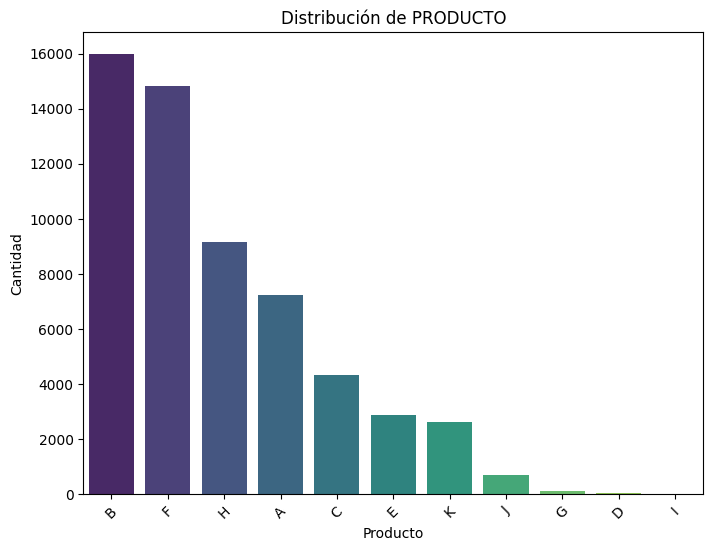

In [89]:
# Mapeo para "PRODUCTO" (suponiendo que la columna fue transformada a números)
producto_mapeo = {0: "A", 1: "B", 2: "C", 3: "H", 4: "J", 5: "D", 6: "I", 7: "E", 8: "F", 9: "K", 10: "G"}
producto_counts = df["PRODUCTO"].value_counts()

# Reemplazar los números por los nombres en la gráfica
producto_counts.index = producto_counts.index.map(producto_mapeo)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(x=producto_counts.index, y=producto_counts.values, palette="viridis", hue=producto_counts.index)

# Personalizar etiquetas
plt.xlabel("Producto")
plt.ylabel("Cantidad")
plt.title("Distribución de PRODUCTO")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()



**TIPO_CARROCERIA.**

In [90]:
df['TIPO_CARROCERIA'].unique()

array(['TIPO1', 'TIPO6', 'TIPO4', 'TIPO7', 'TIPO8', 'TIPO2', 'TIPO3',
       'TIPO5'], dtype=object)

In [91]:
label_encoder = LabelEncoder()
df['TIPO_CARROCERIA'] = label_encoder.fit_transform(df['TIPO_CARROCERIA'])

In [92]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


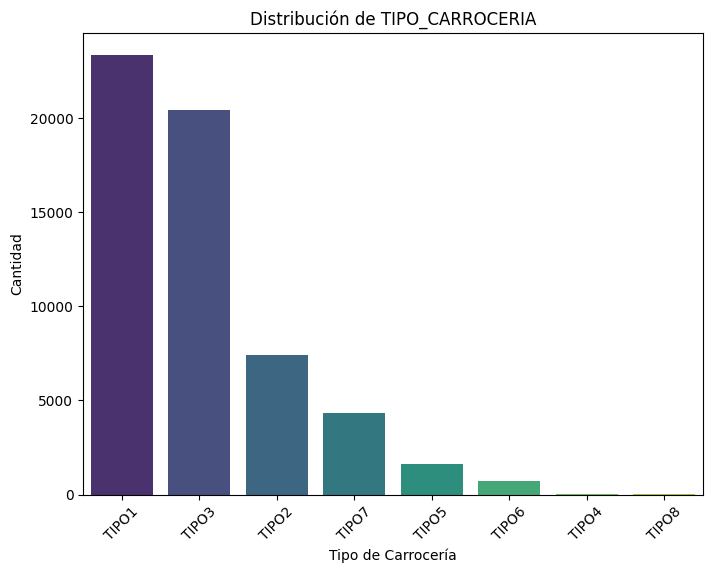

In [93]:
# Mapeo para "TIPO_CARROCERIA"
tipo_carroceria_mapeo = {0: "TIPO1", 1: "TIPO6", 2: "TIPO4", 3: "TIPO7", 4: "TIPO8", 5: "TIPO2", 6: "TIPO3", 7: "TIPO5"}
tipo_carroceria_counts = df["TIPO_CARROCERIA"].value_counts()

# Reemplazar los números por los nombres en la gráfica
tipo_carroceria_counts.index = tipo_carroceria_counts.index.map(tipo_carroceria_mapeo)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(x=tipo_carroceria_counts.index, y=tipo_carroceria_counts.values, palette="viridis", hue=tipo_carroceria_counts.index)

# Personalizar etiquetas
plt.xlabel("Tipo de Carrocería")
plt.ylabel("Cantidad")
plt.title("Distribución de TIPO_CARROCERIA")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()



**COMBUSTIBLE.**

In [94]:
df['COMBUSTIBLE'].unique()

array(['FUEL 1', 'FUEL 2'], dtype=object)

In [95]:
label_encoder = LabelEncoder()
df['COMBUSTIBLE'] = label_encoder.fit_transform(df['COMBUSTIBLE'])

In [96]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


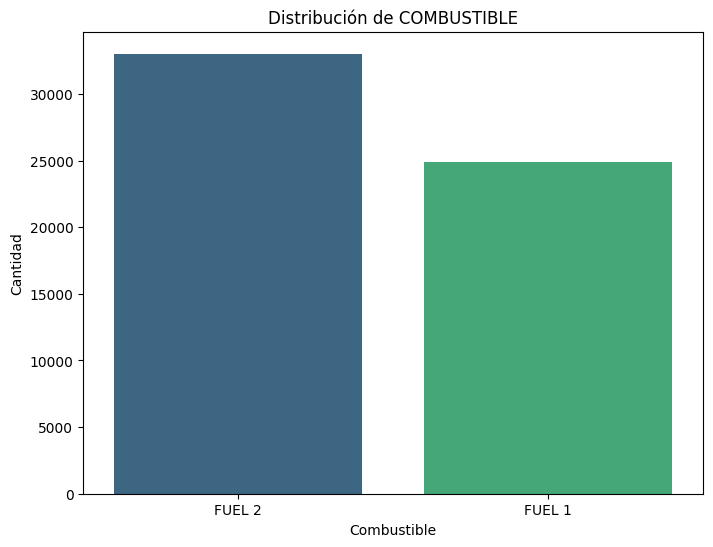

In [97]:
# Mapeo para "COMBUSTIBLE"
combustible_mapeo = {0: "FUEL 1", 1: "FUEL 2"}
combustible_counts = df["COMBUSTIBLE"].value_counts()

# Reemplazar los números por los nombres en la gráfica
combustible_counts.index = combustible_counts.index.map(combustible_mapeo)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(x=combustible_counts.index, y=combustible_counts.values, palette="viridis", hue=combustible_counts.index)

# Personalizar etiquetas
plt.xlabel("Combustible")
plt.ylabel("Cantidad")
plt.title("Distribución de COMBUSTIBLE")
plt.xticks(rotation=0)

# Mostrar la gráfica
plt.show()


**Potencia.**

Se utilizará OrdinalEncoder en las variables que presentan un orden lógico en sus categorías:
Potencia: Baja < Media < Alta.
Zona_Renta: Medio-Bajo < Medio < Alto < Otros.
Averia_grave: No < Averia leve < Averia grave < Averia muy grave.
Para el resto de las variables categóricas, que no tienen un orden inherente, se aplicará LabelEncoder, asegurando que cada categoría sea representada por un valor numérico sin introducir una jerarquía artificial.

In [98]:
orden_correcto = ["Baja", "Media", "Alta"]
encoder = OrdinalEncoder(categories=[orden_correcto])
df["Potencia"] = encoder.fit_transform(df[["Potencia"]])

In [99]:
cols = df.columns.tolist()
indice_potencia = cols.index("Potencia")
cols.insert(indice_potencia + 1, cols.pop(cols.index("Potencia")))
df = df[cols]

In [100]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,M,0.0,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,M,0.0,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


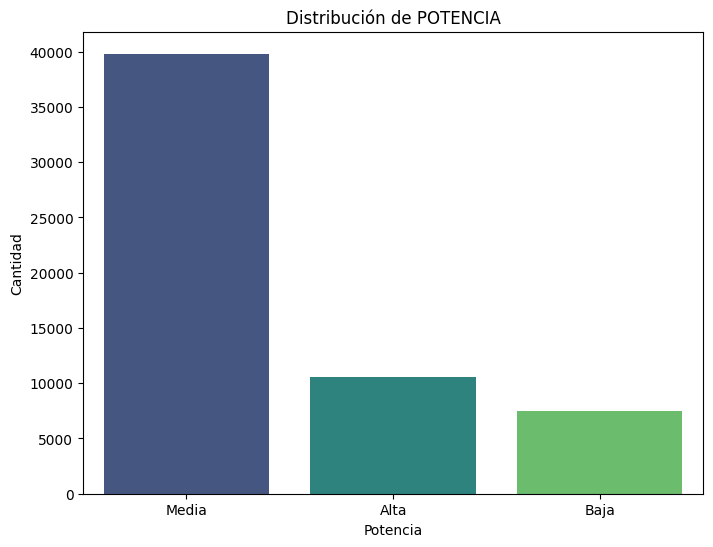

In [101]:
# Mapeo para "POTENCIA"
potencia_mapeo = {0: "Baja", 1: "Media", 2: "Alta"}
potencia_counts = df["Potencia"].value_counts()

# Reemplazar los números por los nombres en la gráfica
potencia_counts.index = potencia_counts.index.map(potencia_mapeo)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(x=potencia_counts.index, y=potencia_counts.values, palette="viridis", hue=potencia_counts.index)

# Personalizar etiquetas
plt.xlabel("Potencia")
plt.ylabel("Cantidad")
plt.title("Distribución de POTENCIA")
plt.xticks(rotation=0)

# Mostrar la gráfica
plt.show()


**TRANS.**

In [102]:
df['TRANS'].unique()

array(['M', 'A'], dtype=object)

In [103]:
label_encoder = LabelEncoder()
df['TRANS'] = label_encoder.fit_transform(df['TRANS'])

In [104]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,Contado,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,Contado,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


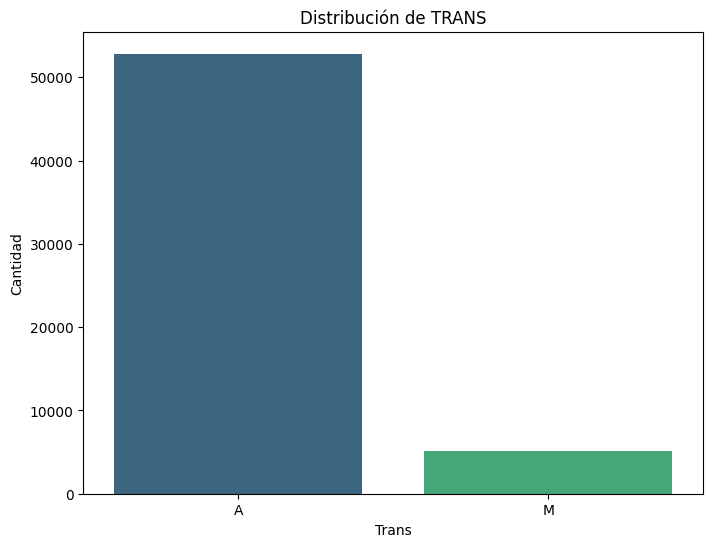

In [105]:
# Mapeo para "TRANS"
trans_mapeo = {0: "M", 1: "A"}
trans_counts = df["TRANS"].value_counts()

# Reemplazar los números por los nombres en la gráfica
trans_counts.index = trans_counts.index.map(trans_mapeo)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(x=trans_counts.index, y=trans_counts.values, palette="viridis", hue=trans_counts.index)

# Personalizar etiquetas
plt.xlabel("Trans")
plt.ylabel("Cantidad")
plt.title("Distribución de TRANS")
plt.xticks(rotation=0)

# Mostrar la gráfica
plt.show()



**FORMA_PAGO.**

In [106]:
df['FORMA_PAGO'].unique()

array(['Contado', 'Otros', 'Financiera Marca', 'Financiera Banco'],
      dtype=object)

In [107]:
label_encoder = LabelEncoder()
df['FORMA_PAGO'] = label_encoder.fit_transform(df['FORMA_PAGO'])

In [108]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,CASADO,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,CASADO,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


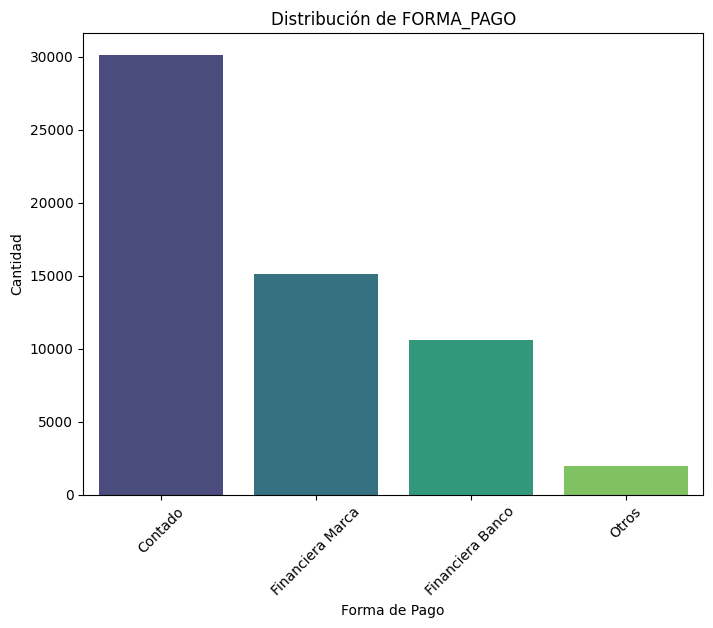

In [109]:
# Mapeo para "FORMA_PAGO"
forma_pago_mapeo = {0: "Contado", 1: "Otros", 2: "Financiera Marca", 3: "Financiera Banco"}
forma_pago_counts = df["FORMA_PAGO"].value_counts()

# Reemplazar los números por los nombres en la gráfica
forma_pago_counts.index = forma_pago_counts.index.map(forma_pago_mapeo)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(x=forma_pago_counts.index, y=forma_pago_counts.values, palette="viridis", hue=forma_pago_counts.index)

# Personalizar etiquetas
plt.xlabel("Forma de Pago")
plt.ylabel("Cantidad")
plt.title("Distribución de FORMA_PAGO")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


**ESTADO_CIVIL.**

In [110]:
df['ESTADO_CIVIL'].unique()

array(['CASADO', 'SOLTERO', 'OTROS', 'EN PAREJA'], dtype=object)

In [111]:
label_encoder = LabelEncoder()
df['ESTADO_CIVIL'] = label_encoder.fit_transform(df['ESTADO_CIVIL'])

In [112]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,M,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,F,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


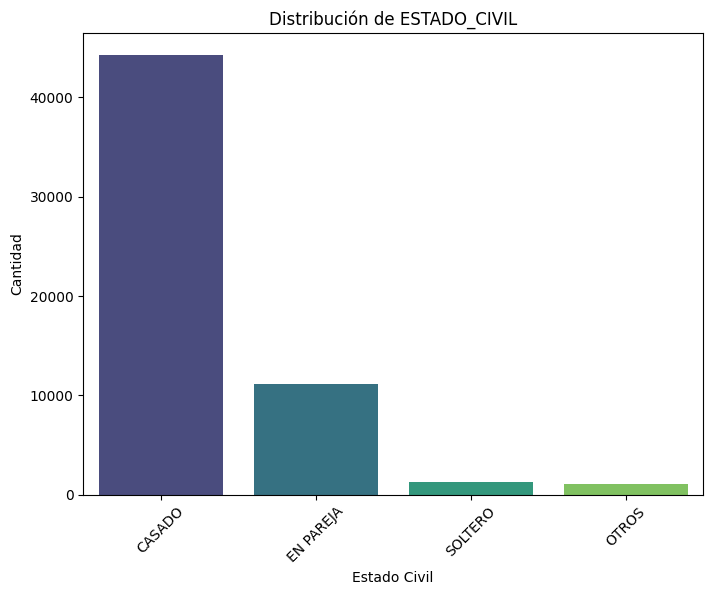

In [113]:
# Mapeo para "ESTADO_CIVIL"
estado_civil_mapeo = {0: "CASADO", 1: "SOLTERO", 2: "OTROS", 3: "EN PAREJA"}
estado_civil_counts = df["ESTADO_CIVIL"].value_counts()

# Reemplazar los números por los nombres en la gráfica
estado_civil_counts.index = estado_civil_counts.index.map(estado_civil_mapeo)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(x=estado_civil_counts.index, y=estado_civil_counts.values, palette="viridis", hue=estado_civil_counts.index)

# Personalizar etiquetas
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad")
plt.title("Distribución de ESTADO_CIVIL")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

**GENERO.**

In [114]:
df['GENERO'].unique()

array(['M', 'F'], dtype=object)

In [115]:
label_encoder = LabelEncoder()
df['GENERO'] = label_encoder.fit_transform(df['GENERO'])

In [116]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,Empresa,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,Empresa,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


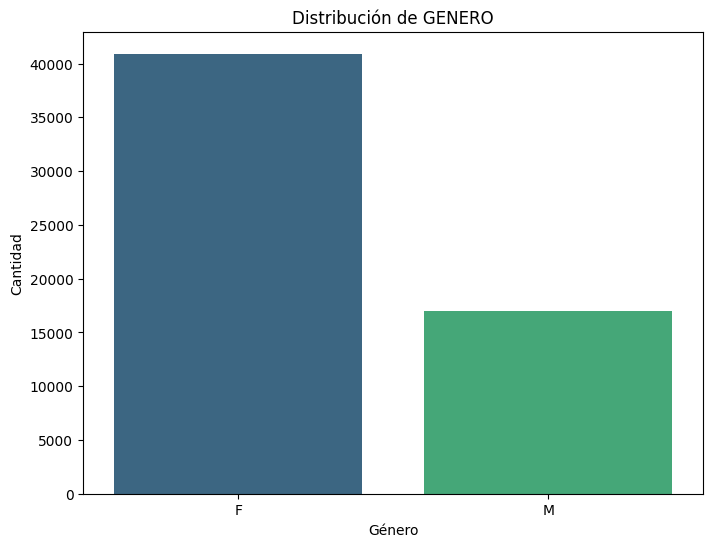

In [117]:
# Mapeo para "GENERO"
genero_mapeo = {0: "M", 1: "F"}
genero_counts = df["GENERO"].value_counts()

# Reemplazar los números por los nombres en la gráfica
genero_counts.index = genero_counts.index.map(genero_mapeo)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(x=genero_counts.index, y=genero_counts.values, palette="viridis", hue=genero_counts.index)

# Personalizar etiquetas
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.title("Distribución de GENERO")
plt.xticks(rotation=0)

# Mostrar la gráfica
plt.show()



**Ocupación.**

In [118]:
df['OcupaciOn'].unique()

array(['Empresa', 'Funcionario', 'Autonomo'], dtype=object)

In [119]:
label_encoder = LabelEncoder()
df['OcupaciOn'] = label_encoder.fit_transform(df['OcupaciOn'])

In [120]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,Asturias,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,Toledo,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


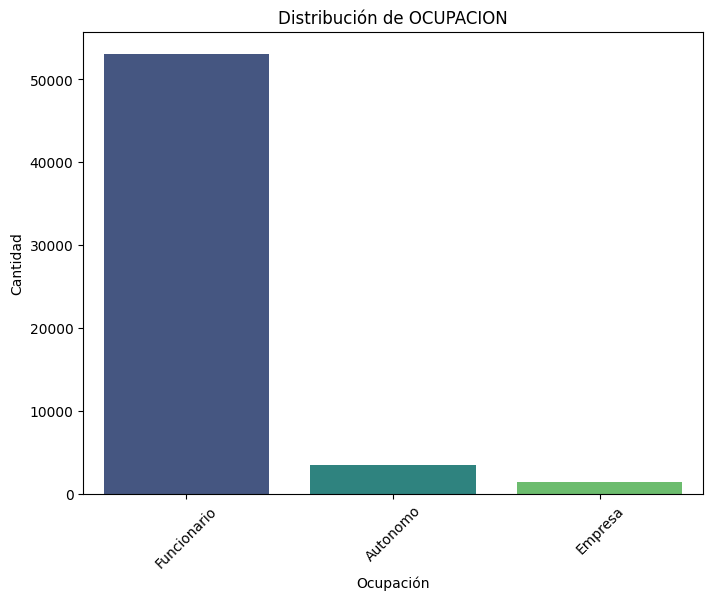

In [121]:
# Mapeo para "OCUPACION"
ocupacion_mapeo = {0: "Empresa", 1: "Funcionario", 2: "Autonomo"}
ocupacion_counts = df["OcupaciOn"].value_counts()

# Reemplazar los números por los nombres en la gráfica
ocupacion_counts.index = ocupacion_counts.index.map(ocupacion_mapeo)

# Crear la gráfica
plt.figure(figsize=(8, 6))
sns.barplot(x=ocupacion_counts.index, y=ocupacion_counts.values, palette="viridis", hue=ocupacion_counts.index)

# Personalizar etiquetas
plt.xlabel("Ocupación")
plt.ylabel("Cantidad")
plt.title("Distribución de OCUPACION")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

**PROVINCIA.**

In [122]:
df['PROVINCIA'].unique()

array(['Asturias', 'Toledo', 'Lerida', 'Madrid', 'Santa Cruz de Tenerife',
       'Pontevedra', 'Lacoruna', 'Barcelona', 'Cordoba', 'Guipuzcua',
       'Valladolid', 'Castellon', 'Valencia', 'Las Palmas', 'La Rioja',
       'Baleares', 'Zaragoza', 'Alicante', 'Tarragona', 'Leon', 'Lugo',
       'Badajoz', 'Vizcaya', 'Sevilla', 'Guadalajara', 'Ciudad Real',
       'Cantabria', 'Orense', 'Navarra', 'Gerona', 'Malaga', 'Jaen',
       'Murcia', 'Burgos', 'Granada', 'Alava', 'Cuenca', 'Cadiz',
       'Salamanca', 'Albacete', 'Almeria', 'Teruel', 'Segovia',
       'Palencia', 'Huelva', 'Huesca', 'Zamora', 'Avila', 'Soria',
       'Caceres', 'Melilla', 'Ceuta', 'Francia'], dtype=object)

In [123]:
label_encoder = LabelEncoder()
df['PROVINCIA'] = label_encoder.fit_transform(df['PROVINCIA'])

In [124]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0


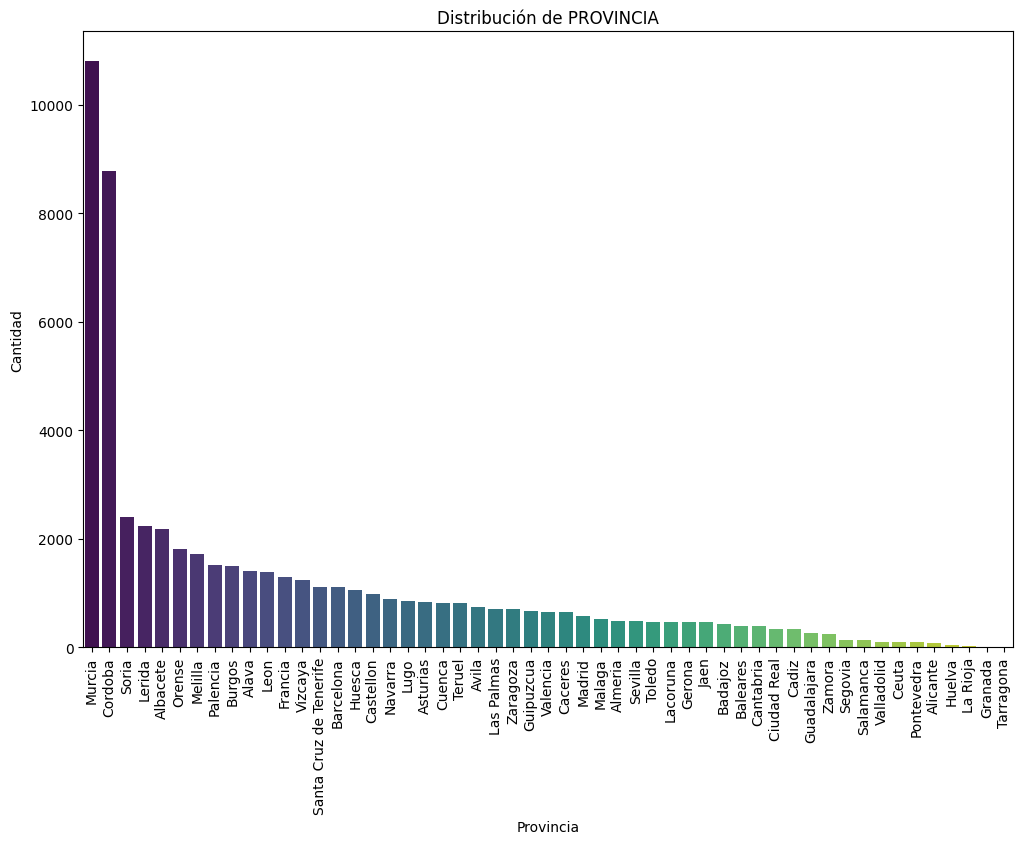

In [125]:
# Crear un diccionario con el mapeo entre los valores numéricos y las provincias
provincias_nombres = {
    0: 'Asturias', 1: 'Toledo', 2: 'Lerida', 3: 'Madrid', 4: 'Santa Cruz de Tenerife', 5: 'Pontevedra',
    6: 'Lacoruna', 7: 'Barcelona', 8: 'Cordoba', 9: 'Guipuzcua', 10: 'Valladolid', 11: 'Castellon', 12: 'Valencia',
    13: 'Las Palmas', 14: 'La Rioja', 15: 'Baleares', 16: 'Zaragoza', 17: 'Alicante', 18: 'Tarragona',
    19: 'Leon', 20: 'Lugo', 21: 'Badajoz', 22: 'Vizcaya', 23: 'Sevilla', 24: 'Guadalajara', 25: 'Ciudad Real',
    26: 'Cantabria', 27: 'Orense', 28: 'Navarra', 29: 'Gerona', 30: 'Malaga', 31: 'Jaen', 32: 'Murcia',
    33: 'Burgos', 34: 'Granada', 35: 'Alava', 36: 'Cuenca', 37: 'Cadiz', 38: 'Salamanca', 39: 'Albacete',
    40: 'Almeria', 41: 'Teruel', 42: 'Segovia', 43: 'Palencia', 44: 'Huelva', 45: 'Huesca', 46: 'Zamora',
    47: 'Avila', 48: 'Soria', 49: 'Caceres', 50: 'Melilla', 51: 'Ceuta', 52: 'Francia'
}

# Contar las frecuencias de "PROVINCIA"
provincia_counts = df["PROVINCIA"].value_counts()

# Cambiar los valores numéricos por los nombres de las provincias usando el mapeo
provincia_counts.index = provincia_counts.index.map(provincias_nombres)

# Crear la gráfica con un tamaño adecuado
plt.figure(figsize=(12, 8))  # Aumentar el tamaño para que las provincias no se solapen
sns.barplot(x=provincia_counts.index, y=provincia_counts.values, palette="viridis", hue=provincia_counts.index)

# Personalizar etiquetas
plt.xlabel("Provincia")
plt.ylabel("Cantidad")
plt.title("Distribución de PROVINCIA")
plt.xticks(rotation=90)  # Rotar las etiquetas para mayor visibilidad

# Mostrar la gráfica
plt.show()

**Campanna1, Campanna2, Campanna3.**

In [126]:
df[['Campanna1', 'Campanna2', 'Campanna3']].apply(pd.Series.unique)

,Campanna1,Campanna2,Campanna3
0,SI,NO,NO
1,NO,SI,SI


In [127]:
label_encoder = LabelEncoder()

for col in ['Campanna1', 'Campanna2', 'Campanna3']:
    df[f'{col}'] = label_encoder.fit_transform(df[col])

In [128]:
label_encoder = LabelEncoder()

for col in ['Campanna1', 'Campanna2', 'Campanna3']:
    df[f'{col}'] = label_encoder.fit_transform(df[col])
    cols = df.columns.tolist()
    disclosure_index = cols.index(col)
    cols.insert(disclosure_index + 1, cols.pop(cols.index(f'{col}')))
    df = df[cols]

In [129]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna3,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,0,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,0,SI,No,NO,1376,7187,False,2,53,0


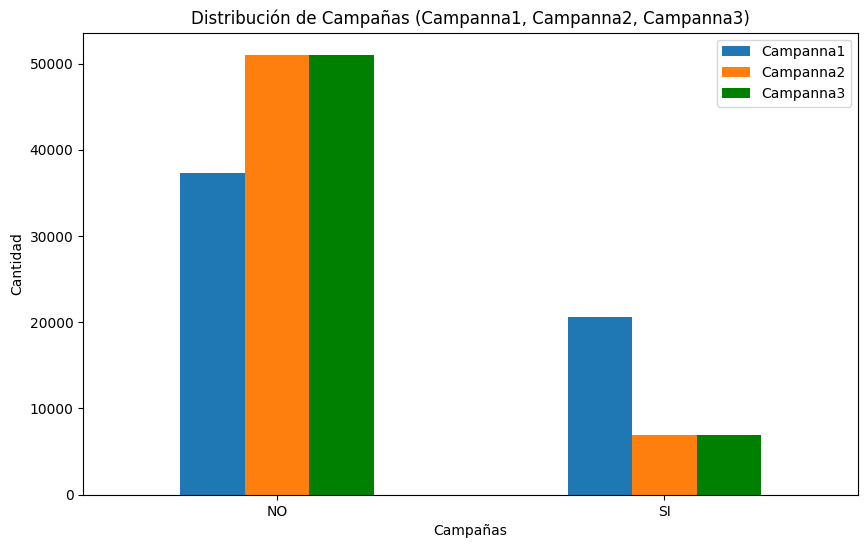

In [130]:
# Reemplazar los valores 0 y 1 por los nombres "NO" y "SI" en las columnas Campanna1, Campanna2, Campanna3
campanna_mapeo = {0: "NO", 1: "SI"}
campanna_counts = df[["Campanna1", "Campanna2", "Campanna3"]].apply(pd.Series.value_counts)

# Reemplazar los valores numéricos por los nombres correspondientes
campanna_counts.index = campanna_counts.index.map(campanna_mapeo)

# Crear la gráfica de barras
campanna_counts.plot(kind='bar', figsize=(10, 6), color=["#1f77b4", "#ff7f0e","green"])

# Personalizar etiquetas
plt.xlabel("Campañas")
plt.ylabel("Cantidad")
plt.title("Distribución de Campañas (Campanna1, Campanna2, Campanna3)")
plt.xticks(rotation=0)

# Mostrar la gráfica
plt.show()

**Zona_Renta**                                

In [131]:
df["Zona_Renta"] = df["Zona_Renta"].fillna("Otros")

In [132]:
df["Zona_Renta"].value_counts()

Zona_Renta
Alto          17140
Otros         14125
Medio         13627
Medio-Bajo    13012
Name: count, dtype: int64

In [133]:
df['Zona_Renta'].unique()

array(['Medio-Bajo', 'Medio', 'Alto', 'Otros'], dtype=object)

In [134]:
orden_correcto = ["Otros", "Medio-Bajo", "Medio", "Alto"]
encoder = OrdinalEncoder(categories=[orden_correcto])
df["Zona_Renta"] = encoder.fit_transform(df[["Zona_Renta"]])

In [135]:
cols = df.columns.tolist()
indice_potencia = cols.index("Zona_Renta")
cols.insert(indice_potencia + 1, cols.pop(cols.index("Zona_Renta")))
df = df[cols]
df['Zona_Renta'].unique()

array([1., 2., 3., 0.])

In [136]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,1.0,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,1.0,SI,No,NO,1376,7187,False,2,53,0


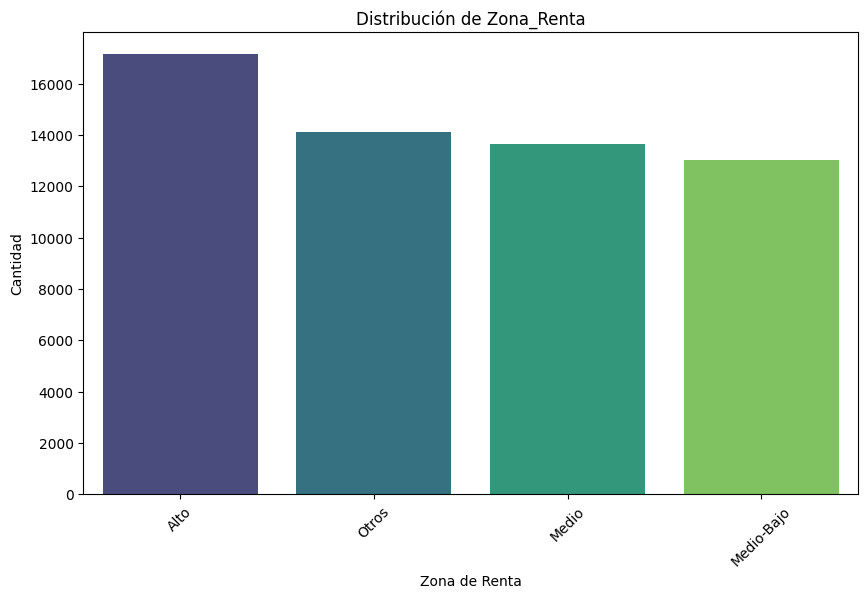

In [137]:
# Definir el orden correcto de las categorías
orden_correcto = ["Otros", "Medio-Bajo", "Medio", "Alto"]

# Contar la cantidad de registros por cada categoría en Zona_Renta
zona_counts = df["Zona_Renta"].value_counts()

# Crear un mapeo de los valores numéricos a los nombres
zona_counts.index = zona_counts.index.map(lambda x: orden_correcto[int(x)])

# Crear la gráfica de barras con los nombres
plt.figure(figsize=(10, 6))
sns.barplot(x=zona_counts.index, y=zona_counts.values, palette="viridis", hue=zona_counts.index)

# Personalizar etiquetas
plt.xlabel("Zona de Renta")
plt.ylabel("Cantidad")
plt.title("Distribución de Zona_Renta")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

**REV_Garantia**

In [138]:
df['REV_Garantia'].unique()

array(['NO DATA', 'SI'], dtype=object)

In [139]:
label_encoder = LabelEncoder()
df['REV_Garantia'] = label_encoder.fit_transform(df['REV_Garantia'])

In [140]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,1.0,0,Averia muy grave,SI,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,1.0,1,No,NO,1376,7187,False,2,53,0


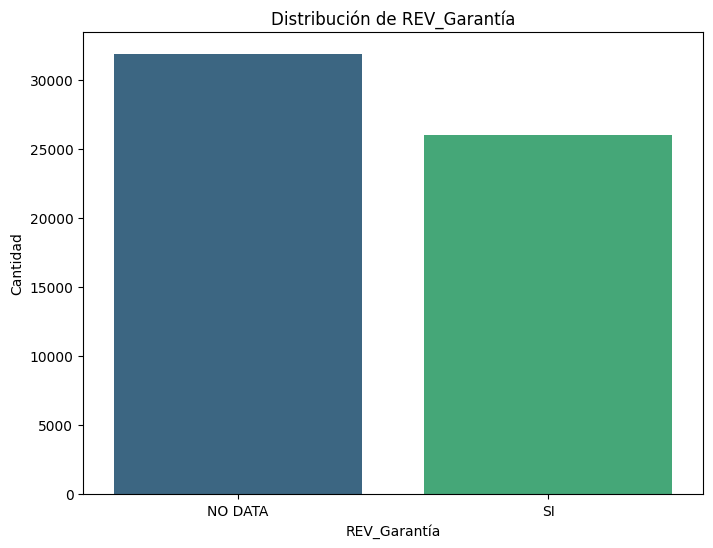

In [141]:
# Supongamos que 'Garantia' es la columna con valores 0 y 1
# Contar la cantidad de registros por cada categoría (0 y 1)
garantia_counts = df["REV_Garantia"].value_counts()

# Crear un mapeo de los valores 0 y 1 a los nombres correspondientes
garantia_counts.index = garantia_counts.index.map({0: 'NO DATA', 1: 'SI'})

# Crear la gráfica de barras con los nombres
plt.figure(figsize=(8, 6))
sns.barplot(x=garantia_counts.index, y=garantia_counts.values, palette="viridis", hue=garantia_counts.index)

# Personalizar etiquetas
plt.xlabel("REV_Garantía")
plt.ylabel("Cantidad")
plt.title("Distribución de REV_Garantía")
plt.xticks(rotation=0)

# Mostrar la gráfica
plt.show()

**Averia_grave**   ..

In [142]:
df['Averia_grave'].unique()

array(['Averia muy grave', 'No', 'Averia leve', 'Averia grave'],
      dtype=object)

In [143]:
orden_correcto = ["No", "Averia leve", "Averia grave", "Averia muy grave"]
encoder = OrdinalEncoder(categories=[orden_correcto])
df["Averia_grave"] = encoder.fit_transform(df[["Averia_grave"]])
cols = df.columns.tolist()
indice_potencia = cols.index("Averia_grave")
cols.insert(indice_potencia + 1, cols.pop(cols.index("Averia_grave")))
df = df[cols]

In [144]:
df['Averia_grave'].unique()

array([3., 0., 1., 2.])

In [145]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,QUEJA_CAC,Averia_grave,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,1.0,0,SI,3.0,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,1.0,1,NO,0.0,1376,7187,False,2,53,0


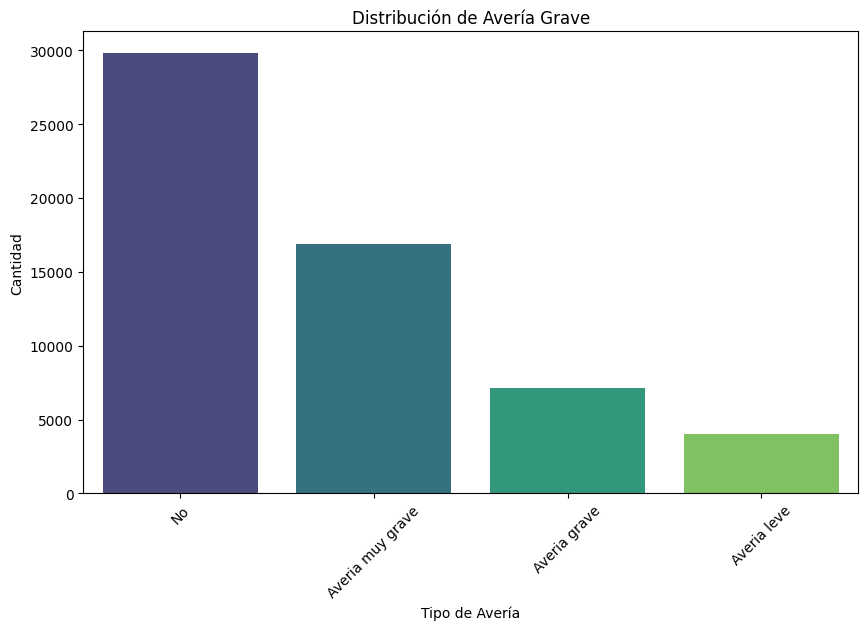

In [146]:
# Contar las frecuencias de cada categoría en "Averia_grave"
averia_counts = df["Averia_grave"].value_counts()

# Definir el mapeo para mostrar las categorías originales
orden_correcto = ["No", "Averia leve", "Averia grave", "Averia muy grave"]
mapeo = {0: "No", 1: "Averia leve", 2: "Averia grave", 3: "Averia muy grave"}

# Reemplazar los valores numéricos con las categorías originales
averia_counts.index = averia_counts.index.map(mapeo)

# Crear la gráfica de barras con los nombres originales
plt.figure(figsize=(10, 6))
sns.barplot(x=averia_counts.index, y=averia_counts.values, palette="viridis", hue=averia_counts.index)

# Personalizar etiquetas
plt.xlabel("Tipo de Avería")
plt.ylabel("Cantidad")
plt.title("Distribución de Avería Grave")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

**QUEJA_CAC**

In [147]:
df['QUEJA_CAC'].unique()

array(['SI', 'NO'], dtype=object)

In [148]:
label_encoder = LabelEncoder()
df['QUEJA_CAC'] = label_encoder.fit_transform(df['QUEJA_CAC'])

In [149]:
df.head(2)

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,QUEJA_CAC,Averia_grave,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,1.0,0,1,3.0,2892,0,False,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,1.0,1,0,0.0,1376,7187,False,2,53,0


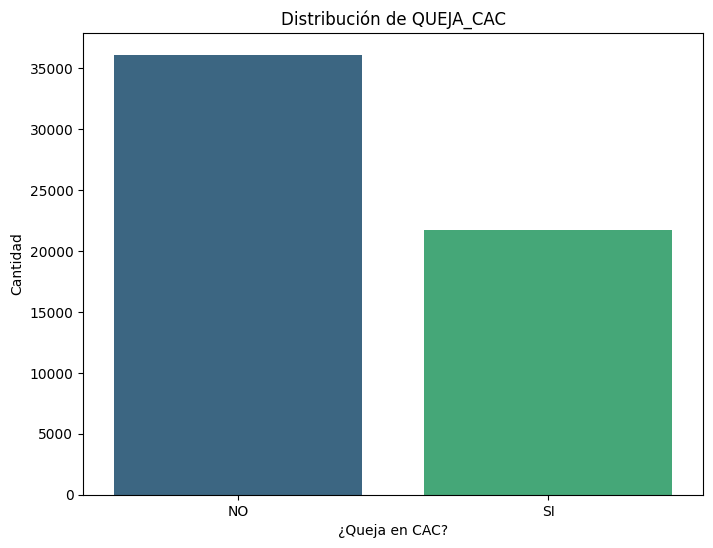

In [150]:
# Contar las frecuencias de "QUEJA_CAC" (que tiene valores 0 y 1)
queja_counts = df["QUEJA_CAC"].value_counts()

# Definir el mapeo de 0 y 1 a los nombres "NO" y "SI"
mapeo_queja = {0: "NO", 1: "SI"}

# Reemplazar los valores 0 y 1 por "NO" y "SI"
queja_counts.index = queja_counts.index.map(mapeo_queja)

# Crear la gráfica de barras con los nombres "NO" y "SI"
plt.figure(figsize=(8, 6))
sns.barplot(x=queja_counts.index, y=queja_counts.values, palette="viridis", hue=queja_counts.index)

# Personalizar etiquetas
plt.xlabel("¿Queja en CAC?")
plt.ylabel("Cantidad")
plt.title("Distribución de QUEJA_CAC")
plt.xticks(rotation=0)

# Mostrar la gráfica
plt.show()

#### Tratamiento de variables continuas.

In [151]:
df[v_continuas].nunique()

COSTE_VENTA      2833
km_anno         21511
Mas_1_coche         2
Revisiones         14
Edad_Cliente       54
Tiempo             14
dtype: int64

In [152]:
df[v_continuas].head(3)

,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,
CLI1,2892,0,False,2,18,0
CLI2,1376,7187,False,2,53,0
CLI3,1376,0,True,4,21,3


In [153]:
df[v_continuas].describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,57904.000000,57904.000000,57904.000000,57904.000000,57904.000000
mean,2540.657416,11832.042847,3.535559,47.362255,1.862497
std,1605.129977,10201.406504,2.527840,11.225932,3.093356
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11505.000000,3.000000,48.000000,0.000000
75%,3309.000000,17938.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


**COSTE VENTA**

In [154]:
Q1 = df["COSTE_VENTA"].quantile(0.25)
Q3 = df["COSTE_VENTA"].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = df[(df["COSTE_VENTA"] < lim_inf) | (df["COSTE_VENTA"] > lim_sup)]
print(f"Número de outliers detectados: {len(outliers)}")

Número de outliers detectados: 2141


Revisar valores extremos

In [155]:
print(df["COSTE_VENTA"].sort_values().head(10))  # 10 valores más bajos
print(df["COSTE_VENTA"].sort_values(ascending=False).head(10))  # 10 valores más altos

CODE
CLI34223    0
CLI34229    0
CLI34245    0
CLI34248    0
CLI34259    0
CLI34301    0
CLI35684    0
CLI35692    0
CLI51194    0
CLI35706    0
Name: COSTE_VENTA, dtype: int64
CODE
CLI25915    18455
CLI40584    14001
CLI6669     13626
CLI40284    13452
CLI40332    13452
CLI41439    13452
CLI40340    13452
CLI40286    13248
CLI39229    12976
CLI21688    12508
Name: COSTE_VENTA, dtype: int64


In [156]:
df["COSTE_VENTA"].describe(percentiles=[0.01, 0.05, 0.95, 0.99])

count    57904.000000
mean      2540.657416
std       1605.129977
min          0.000000
1%           0.000000
5%           0.000000
50%       2353.000000
95%       5501.000000
99%       7573.000000
max      18455.000000
Name: COSTE_VENTA, dtype: float64

In [157]:
df[df["COSTE_VENTA"] == 0].describe()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna3,Zona_Renta,REV_Garantia,QUEJA_CAC,Averia_grave,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,...,4607.000000,4607.000000,4607.000000,4607.000000,4607.000000,4607.0,4607.000000,4607.000000,4607.00000,4607.000000
mean,4.948122,3.311265,0.608422,0.925331,1.219666,0.558498,0.620360,0.764489,1.020838,25.474712,...,0.000868,1.718906,0.342956,0.643586,2.016280,0.0,15051.421098,5.532885,48.05687,1.089212
std,3.375430,2.933318,0.488156,0.262885,0.664479,1.097107,1.183639,0.424364,0.296161,14.936723,...,0.029456,1.100170,0.474749,0.478992,1.221797,0.0,8651.984665,2.155221,9.77290,1.972253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,18.00000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,8.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,9684.000000,4.000000,41.00000,0.000000
50%,3.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.000000,...,0.000000,2.000000,0.000000,1.000000,3.000000,0.0,14245.000000,5.000000,48.00000,0.000000
75%,9.000000,6.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,35.000000,...,0.000000,3.000000,1.000000,1.000000,3.000000,0.0,19703.000000,7.000000,56.00000,2.000000
max,10.000000,7.000000,1.000000,1.000000,2.000000,3.000000,3.000000,1.000000,2.000000,52.000000,...,1.000000,3.000000,1.000000,1.000000,3.000000,0.0,182331.000000,13.000000,71.00000,8.000000


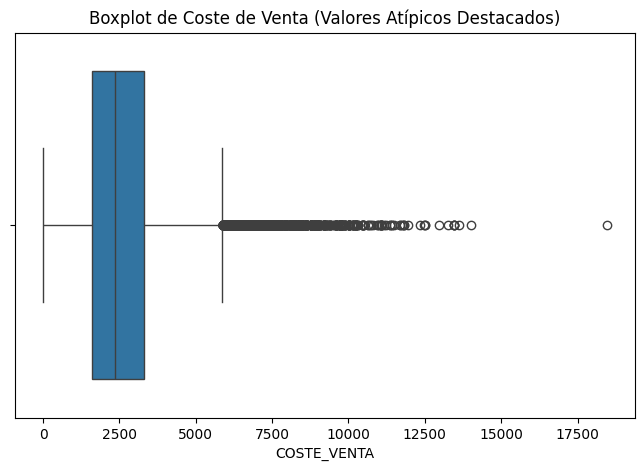

In [158]:
# Crear boxplot sin modificar los datos
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['COSTE_VENTA'])
plt.title('Boxplot de Coste de Venta (Valores Atípicos Destacados)')
plt.show()

In [160]:
# Eliminar solo el registro específico con coste_venta = 18455
df = df[df['COSTE_VENTA'] != 18455]

# Verificar que se eliminó
print(f"Antes: {df.shape[0]} filas")
print(f"Después: {df.shape[0]} filas")

Antes: 57903 filas
Después: 57903 filas


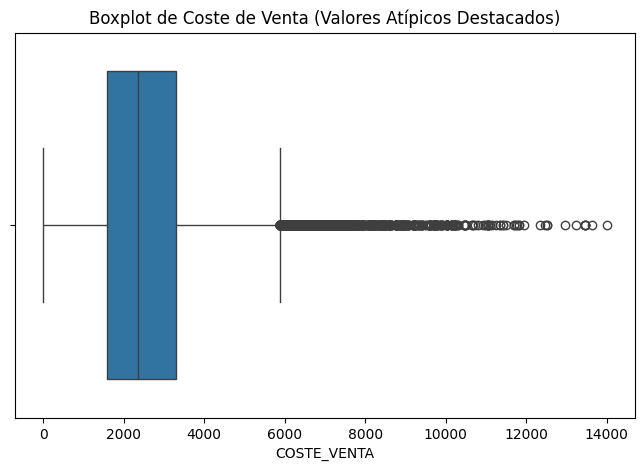

In [161]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['COSTE_VENTA'])
plt.title('Boxplot de Coste de Venta (Valores Atípicos Destacados)')
plt.show()

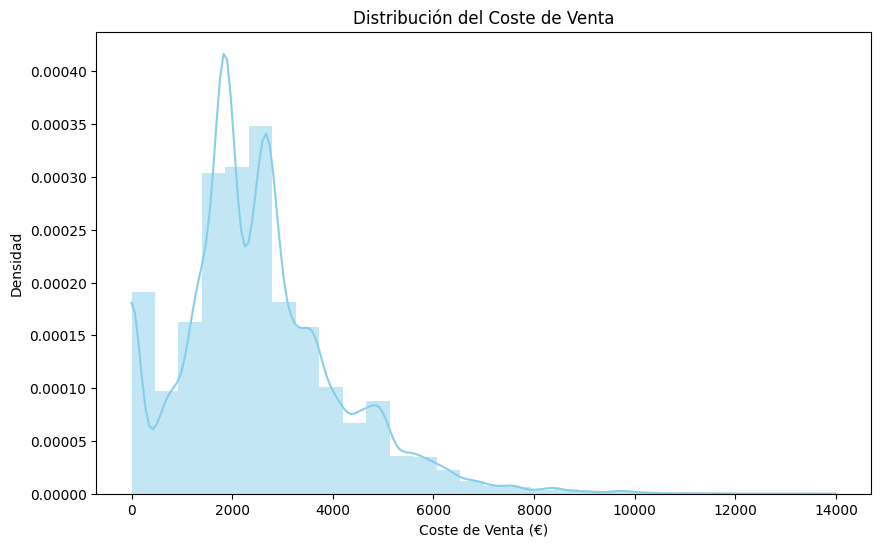

In [162]:
# Crear el histograma para visualizar la distribución de los valores de "coste_venta"
plt.figure(figsize=(10, 6))
sns.histplot(df['COSTE_VENTA'], bins=30, kde=True, color="skyblue", stat="density", linewidth=0)

# Personalizar etiquetas
plt.xlabel("Coste de Venta (€)")
plt.ylabel("Densidad")
plt.title("Distribución del Coste de Venta")

# Mostrar la gráfica
plt.show()

**KM Año**

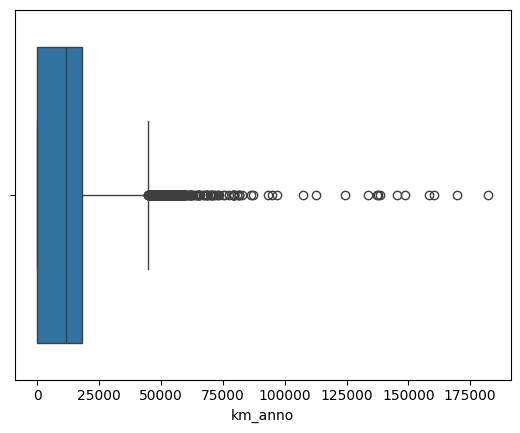

In [163]:
sns.boxplot(x=df['km_anno'])
plt.show()

In [164]:
print(df["km_anno"].sort_values().head(10))  # 10 valores más bajos
print(df["km_anno"].sort_values(ascending=False).head(10))  # 10 valores más altos

CODE
CLI57754    0
CLI40813    0
CLI30736    0
CLI33       0
CLI35       0
CLI37       0
CLI39       0
CLI40       0
CLI41       0
CLI43       0
Name: km_anno, dtype: int64
CODE
CLI32059    182331
CLI44512    169803
CLI47366    160511
CLI30439    158226
CLI47852    148688
CLI33185    145481
CLI47065    138603
CLI14310    137787
CLI53566    137226
CLI42138    133499
Name: km_anno, dtype: int64


In [165]:
def eliminar_outliers_percentiles(df, columna, p_inf=15, p_sup=85):
    limite_inferior = df[columna].quantile(p_inf / 100)  # Percentil 15
    limite_superior = df[columna].quantile(p_sup / 100)  # Percentil 85

    # Filtrar valores dentro del rango permitido
    df_sin_outliers = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    
    return df_sin_outliers

# Uso con la columna 'km_anno'
df_limpio = eliminar_outliers_percentiles(df, 'km_anno')

# Mostrar resumen antes y después
print(f"Antes: {df.shape[0]} filas")
print(f"Después: {df_limpio.shape[0]} filas")

Antes: 57903 filas
Después: 49217 filas


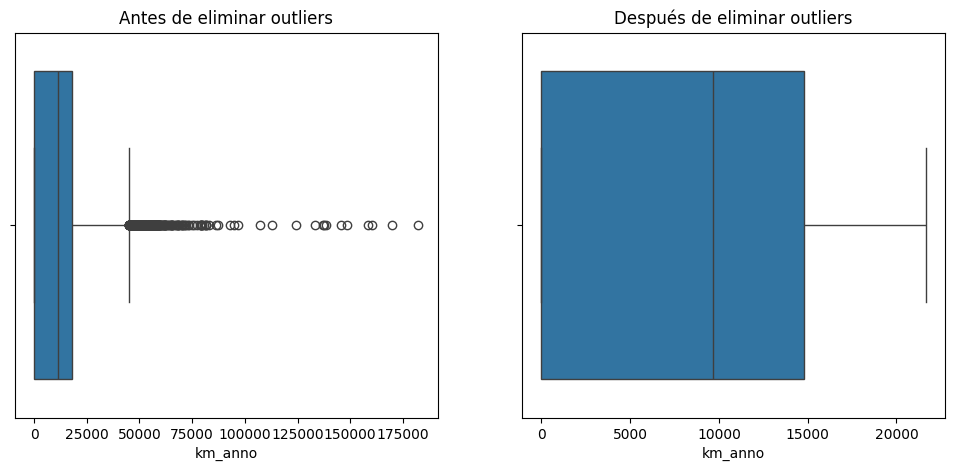

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot antes de eliminar outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['km_anno'])
plt.title('Antes de eliminar outliers')

# Aplicar la función para limpiar outliers
df_limpio = eliminar_outliers_percentiles(df, 'km_anno')

# Boxplot después de eliminar outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['km_anno'])
plt.title('Después de eliminar outliers')

plt.show()

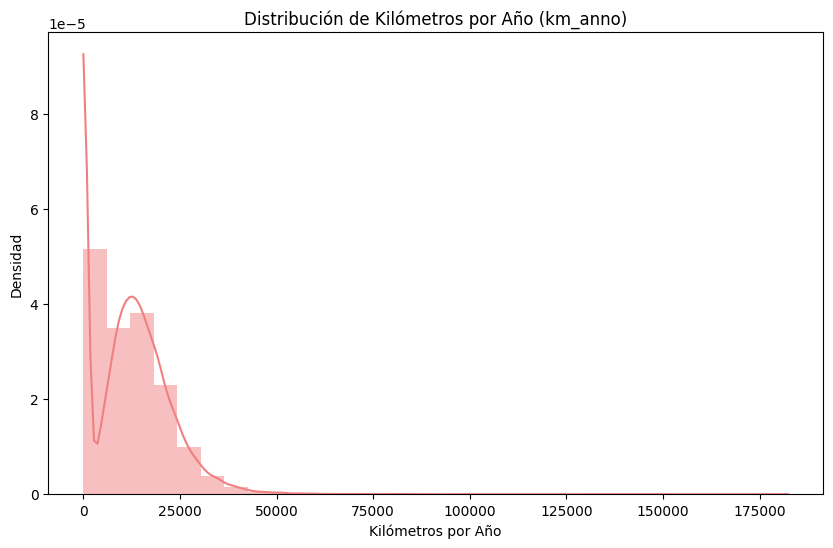

In [167]:
# Crear el histograma para visualizar la distribución de los valores de "km_anno"
plt.figure(figsize=(10, 6))
sns.histplot(df['km_anno'], bins=30, kde=True, color="lightcoral", stat="density", linewidth=0)

# Personalizar etiquetas
plt.xlabel("Kilómetros por Año")
plt.ylabel("Densidad")
plt.title("Distribución de Kilómetros por Año (km_anno)")

# Mostrar la gráfica
plt.show()

**Mas_1_coche**

Análisis descriptivo

In [168]:
df['Mas_1_coche'].value_counts(normalize=True) * 100  # Porcentaje de cada categoría

Mas_1_coche
False    70.766627
True     29.233373
Name: proportion, dtype: float64

In [169]:
df['Mas_1_coche'] = df['Mas_1_coche'].astype(int)  # Convierte True/False a 1/0 si es necesario

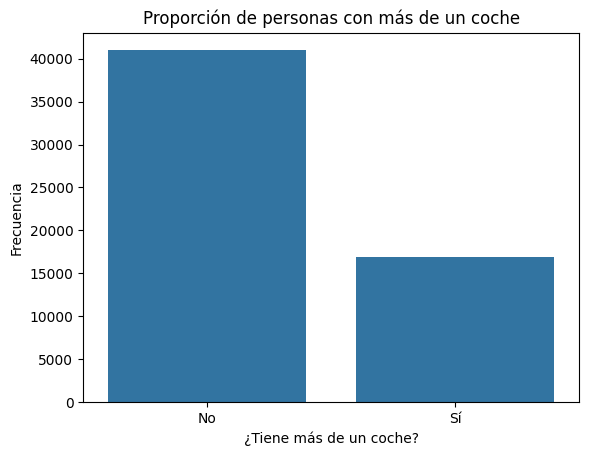

In [170]:
sns.countplot(x=df['Mas_1_coche'])
plt.xlabel("¿Tiene más de un coche?")
plt.ylabel("Frecuencia")
plt.xticks([0,1], ["No", "Sí"])
plt.title("Proporción de personas con más de un coche")
plt.show()

**Revisiones**

In [171]:
df['Revisiones'].unique()  # Lista de valores únicos
df['Revisiones'].value_counts()  # Frecuencia de cada valor

Revisiones
2     12467
1     10532
4      8768
7      5978
3      4342
0      3947
5      3808
6      3480
9      2261
8      2129
10      120
11       52
12       11
13        8
Name: count, dtype: int64

In [172]:
df['Revisiones'].describe()  # Estadísticas básicas 

count    57903.000000
mean         3.535551
std          2.527861
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         13.000000
Name: Revisiones, dtype: float64

Media = 3.53 → En promedio, los coches tienen alrededor de 3-4 revisiones.

Mínimo = 0 → Algunos coches no tienen ninguna revisión registrada.

Máximo = 13 → Hay coches con hasta 13 revisiones.

Distribución: La mayoría tiene entre 1 y 5 revisiones, pero hay algunos valores más altos (posibles outliers).

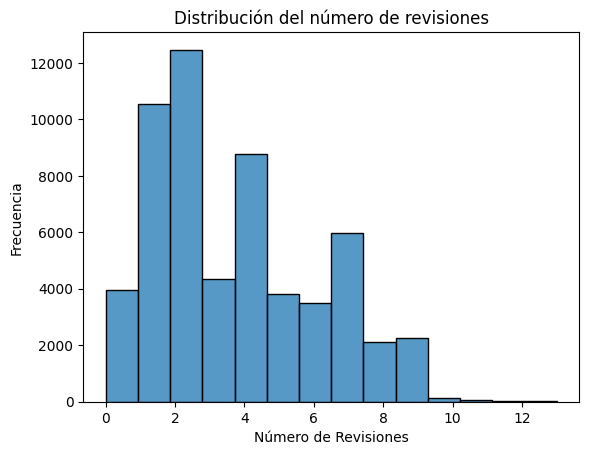

In [173]:
# Histograma
sns.histplot(df['Revisiones'], bins=14, kde=False)
plt.xlabel("Número de Revisiones")
plt.ylabel("Frecuencia")
plt.title("Distribución del número de revisiones")
plt.show()

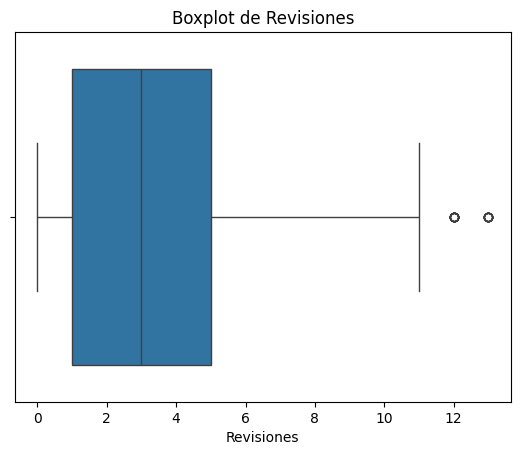

In [174]:
# Boxplot para ver outliers
sns.boxplot(x=df['Revisiones'])
plt.title("Boxplot de Revisiones")
plt.show()

In [175]:
# Calcular los percentiles 5 y 95
p5 = df['Revisiones'].quantile(0.05)
p95 = df['Revisiones'].quantile(0.95)

# Filtrar los datos dentro de este rango
df = df[(df['Revisiones'] >= p5) & (df['Revisiones'] <= p95)]

# Mostrar cuántas filas eliminamos
print(f"Antes: {df.shape[0]} filas")
print(f"Después: {df.shape[0]} filas")

Antes: 55451 filas
Después: 55451 filas


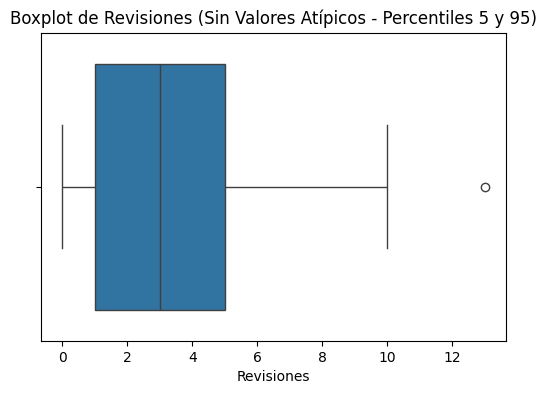

In [176]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_limpio['Revisiones'])
plt.title('Boxplot de Revisiones (Sin Valores Atípicos - Percentiles 5 y 95)')
plt.show()

**Edad Cliente**

In [177]:
df['Edad_Cliente'].nunique()  # Número de valores únicos
df['Edad_Cliente'].value_counts().sort_index()  # Frecuencia de cada edad

Edad_Cliente
18     150
19     149
20     178
21     462
22     517
23     493
24     465
25     500
26     474
27     452
28     464
29     464
30     502
31     515
32     514
33     312
34     321
35     310
36     315
37    1734
38    1788
39    1740
40    1660
41    1754
42    1756
43    1769
44    1688
45    1796
46    1783
47    1710
48    1796
49    1684
50    1730
51    1748
52    1712
53    1751
54    1741
55    1680
56    1702
57    1773
58    1631
59    1796
60    1717
61    1688
62    1713
63     327
64     293
65     315
66     292
67     357
68     322
69     325
70     314
71     309
Name: count, dtype: int64

In [178]:
df['Edad_Cliente'].describe()  # Estadísticas básicas

count    55451.000000
mean        47.349750
std         11.261735
min         18.000000
25%         40.000000
50%         48.000000
75%         56.000000
max         71.000000
Name: Edad_Cliente, dtype: float64

Resumen de las edades:

Media = 47.36 años → La edad promedio de los clientes está en los 40s y 50s.

Mínimo = 18 años → No hay edades menores de 18 (lo cual es bueno).

Máximo = 71 años → No hay valores absurdos (ej. 120 años), así que parece correcto.

Mediana = 48 años → La mitad de los clientes tiene menos de 48 años.

Percentiles:

25% = 40 años

75% = 56 años

Distribución bastante centrada en adultos de mediana edad.

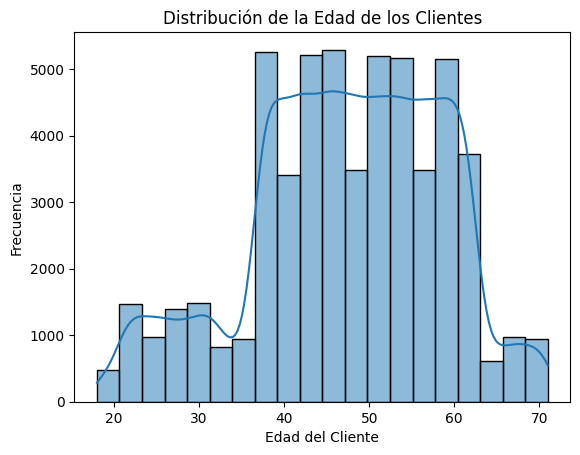

In [179]:
# Histograma
sns.histplot(df['Edad_Cliente'], bins=20, kde=True)
plt.xlabel("Edad del Cliente")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Edad de los Clientes")
plt.show()

La mayor cantidad de clientes está en los 30s, 40s y 50s.

Hay menos clientes jóvenes (18-29 años) y mayores de 65 años.

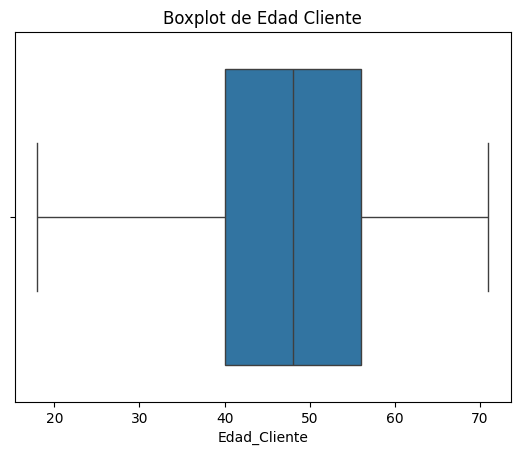

In [180]:
sns.boxplot(x=df['Edad_Cliente'])
plt.title("Boxplot de Edad Cliente")
plt.show()

**Tiempo**

In [181]:
df['Tiempo'].nunique()  # Cantidad de valores únicos
df['Tiempo'].unique()   # Valores únicos  FUNCION DE REGRESIÓN
df['Tiempo'].value_counts()  # Frecuencia de cada valor

Tiempo
0     39249
6      3190
7      2663
5      2253
8      2214
4      1953
9      1585
10     1091
3      1007
2       202
11       27
12        7
13        5
14        5
Name: count, dtype: int64

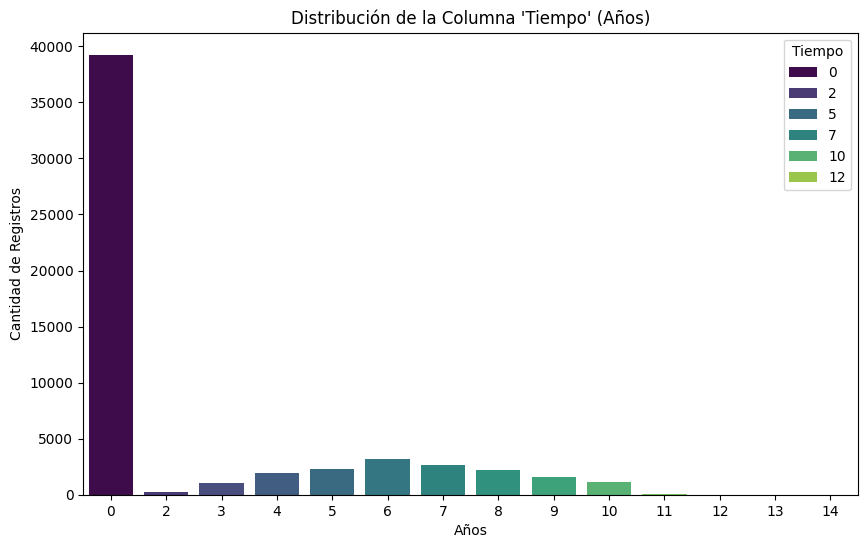

In [182]:
# Crear la gráfica de barras para la columna "Tiempo"
plt.figure(figsize=(10, 6))
sns.barplot(x=df["Tiempo"].value_counts().index, y=df["Tiempo"].value_counts().values, palette="viridis", hue=df["Tiempo"].value_counts().index)

# Personalizar etiquetas
plt.xlabel("Años")
plt.ylabel("Cantidad de Registros")
plt.title("Distribución de la Columna 'Tiempo' (Años)")

# Mostrar la gráfica
plt.show()

## **Modelo de Clasificación: Más de un Coche.**

In [184]:
df.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,TRANS,Potencia,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Zona_Renta,REV_Garantia,QUEJA_CAC,Averia_grave,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
CODE,,,,,,,,,,,,,,,,,,,,,
CLI1,0,0,0,1,0.0,0,0,1,1,4,...,1.0,0,1,3.0,2892,0,0,2,18,0
CLI2,0,0,0,1,0.0,0,0,0,1,47,...,1.0,1,0,0.0,1376,7187,0,2,53,0
CLI3,0,0,0,1,0.0,3,0,1,1,30,...,2.0,0,0,0.0,1376,0,1,4,21,3
CLI4,0,0,0,1,0.0,2,0,0,1,32,...,2.0,1,1,3.0,2015,7256,1,4,48,5
CLI5,0,0,0,1,0.0,2,0,0,2,41,...,3.0,0,0,0.0,1818,0,1,3,21,3


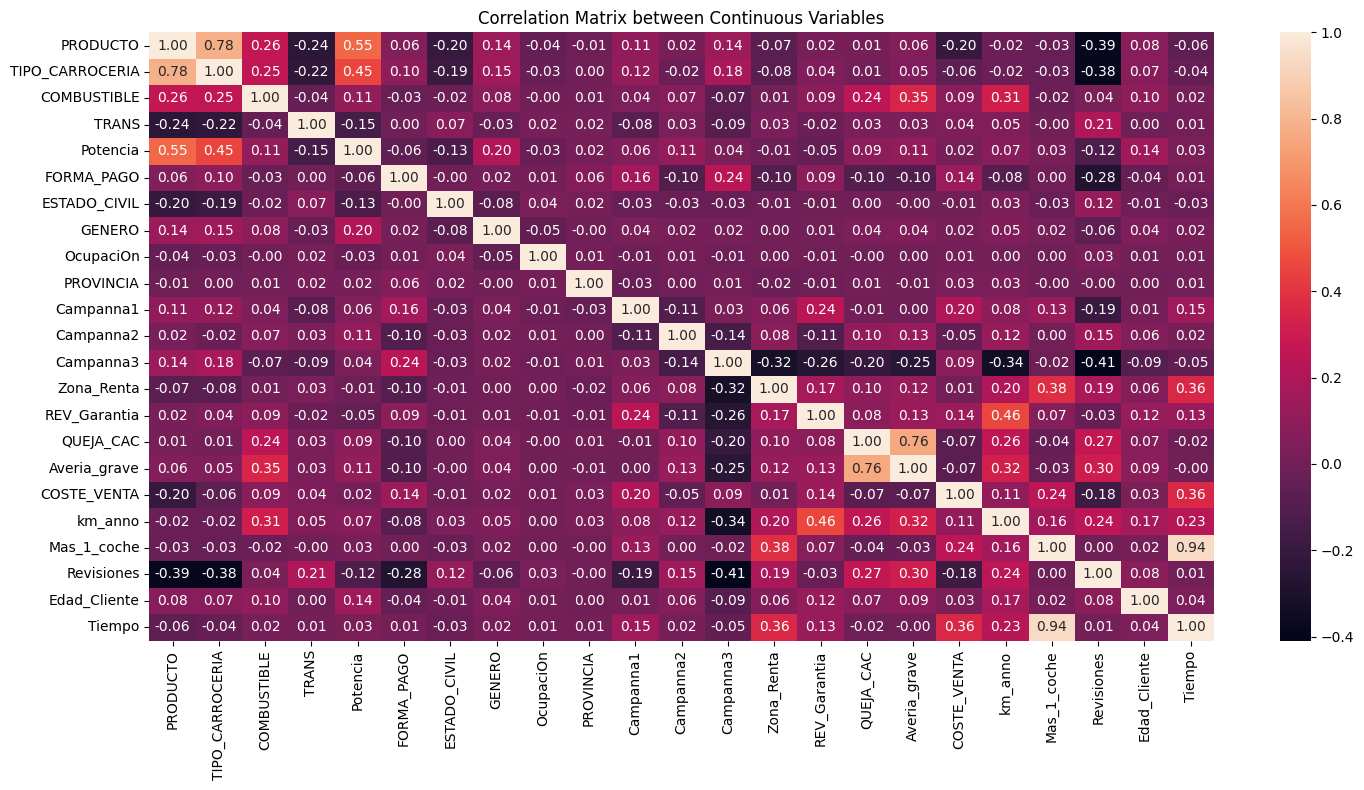

In [186]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix between Continuous Variables')
plt.tight_layout()
plt.show()

In [ ]:
# Tabla de resultados
results = pd.DataFrame(columns=['Model', 'Tipo', 'Accuracy', 'Recall'])
results['Tipo'] = ['Binary']*3

### Definir las características (features) y el objetivo (target) y división en entrenamiento y prueba.

In [ ]:
X = df.drop(columns=['Mas_1_coche', 'Tiempo'])  # Eliminamos también la columna 'Tiempo' por su alta correlación
y = df['Mas_1_coche']  # Objetivo

In [189]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Random Forest Classifier.**

Tu modelo de Random Forest está optimizado para recall, lo cual es clave si lo que más importa es reducir los falsos negativos (es decir, minimizar los casos en los que el modelo no detecta correctamente a los clientes que comprarían un segundo coche).

#### Ajuste de hiperparámetros.

In [197]:
# Definir los parámetros para la búsqueda de Grid
param_grid = {
    'criterion': ['entropy'],  
    'max_depth': [15, 18],  
    'min_samples_split': [7, 11],  
    'min_samples_leaf': [3],  
    'n_estimators': [500],  
}
# Almacenar los resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    criterion, max_depth, min_samples_split, min_samples_leaf, n_estimators = params
    
    # Construir el modelo RandomForest con class_weight='balanced'
    model = RandomForestClassifier(
        criterion=criterion, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        n_estimators=n_estimators,
        class_weight='balanced',  # <-- Agregado para mejorar recall
        random_state=42
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades
    y_pred = (y_pred_proba > 0.4).astype(int)  # Ajustar umbral de decisión 
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')  # <-- Enfocarse en recall
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')  # <-- Optimizar recall
    mean_cv_score = np.mean(cv_scores)
    
    # Guardar los resultados
    results.append({
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'n_estimators': n_estimators,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,  # <-- Priorizar recall
        'roc_auc': roc_auc,
        'cv_recall': mean_cv_score  # <-- Guardar recall en validación cruzada
    })

# Convertir a DataFrame y ordenar por recall
results_df = pd.DataFrame(results).sort_values(by=['recall', 'f1_score'], ascending=False)

# Mostrar los mejores modelos optimizados para recall
display(results_df.head(5))

,criterion,max_depth,min_samples_split,min_samples_leaf,n_estimators,accuracy,f1_score,recall,roc_auc,cv_recall
2,entropy,18,7,3,500,0.831124,0.837482,0.831124,0.935882,0.831686
3,entropy,18,11,3,500,0.827247,0.833946,0.827247,0.935573,0.840491
0,entropy,15,7,3,500,0.823190,0.830260,0.823190,0.934090,0.842808
1,entropy,15,11,3,500,0.821206,0.828482,0.821206,0.933341,0.849915


In [198]:
results_df.to_csv('models/RandomForest_results.csv', index=False)

**Parámetros usados:**
- criterion: Para dividir los nodos del árbol.
- max_depth: Para evitar sobreajuste.
- min_samples_split: Para controlar el tamaño mínimo de los grupos.
- min_samples_leaf: Para evitar ramas muy pequeñas.
- n_estimators: Número de árboles en el bosque.

**Resultados destacados:** El mejor modelo tiene un Recall de 0.8308, lo que significa que captura el 83% de los clientes que comprarían un segundo coche. El AUC-ROC de 0.9355 indica que el modelo es bueno diferenciando entre clases. Validación cruzada: El mejor modelo tiene un CV Recall de 0.8415, lo que indica que el rendimiento es estable en diferentes subconjuntos de los datos.

#### Evaluación del modelo.

In [220]:
model = RandomForestClassifier(
    criterion='entropy',  
    max_depth=18,  
    min_samples_split=7,  
    min_samples_leaf=3,  
    n_estimators=500,  
    class_weight='balanced',  
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=18, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=500, random_state=42)

In [221]:
# Predicciones en el conjunto de prueba.
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [222]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7835
           1       0.70      0.84      0.77      3256

    accuracy                           0.85     11091
   macro avg       0.82      0.85      0.83     11091
weighted avg       0.86      0.85      0.85     11091



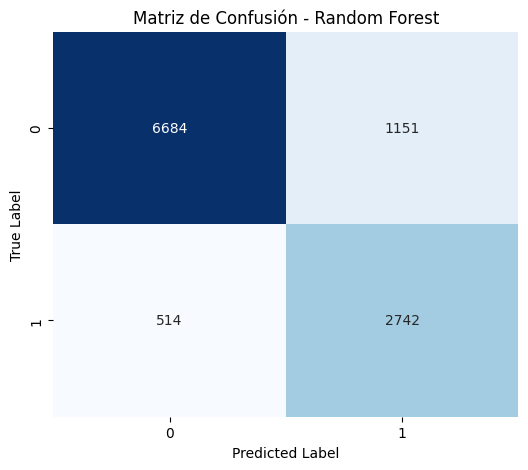

In [223]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matriz de Confusión - Random Forest')
plt.show()

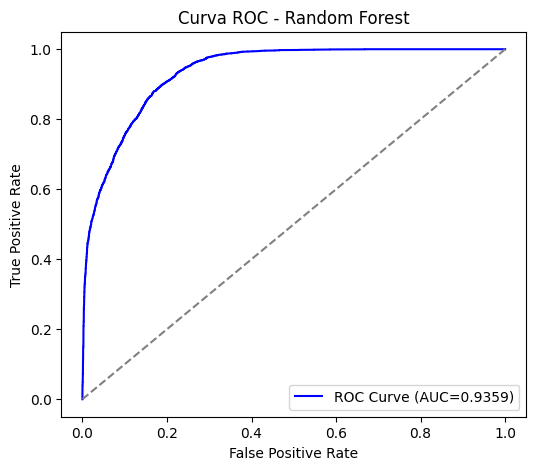

In [224]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_pred_proba):.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Curva ROC - Random Forest')
plt.legend()
plt.show()

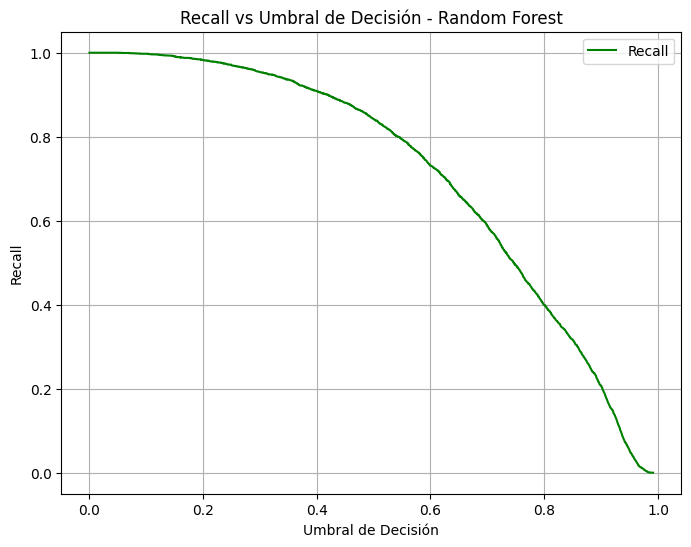

In [227]:
# Obtener probabilidades del modelo seleccionado
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades de clase 1

# Calcular Precision-Recall para diferentes umbrales
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Graficar Recall vs Umbral de Decisión
plt.figure(figsize=(8, 6))
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.xlabel('Umbral de Decisión')
plt.ylabel('Recall')
plt.title('Recall vs Umbral de Decisión - Random Forest')
plt.grid(True)
plt.legend()
plt.show()

#### Cambio del Umbral Óptimo.

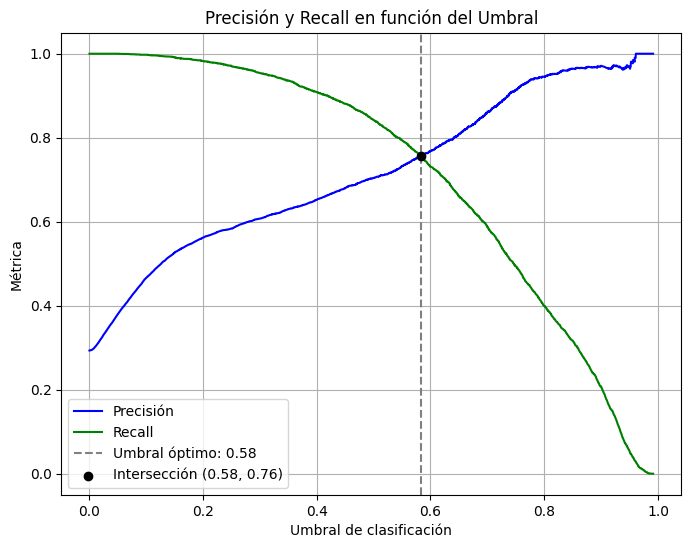

In [226]:
# Obtener probabilidades del modelo.
y_scores = model.predict_proba(X_test)[:, 1]

# Calcular precision, recall y umbrales.
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Encontrar el punto de intersección entre precisión y recall.
diff = np.abs(precision - recall)
min_diff_idx = np.argmin(diff)
optimal_threshold = thresholds[min_diff_idx]
optimal_value = precision[min_diff_idx]

# Graficar Precision-Recall vs Umbral.
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precisión", color='blue')
plt.plot(thresholds, recall[:-1], label="Recall", color='green')
plt.axvline(x=optimal_threshold, linestyle="--", color="gray", label=f"Umbral óptimo: {optimal_threshold:.2f}")
plt.scatter(optimal_threshold, optimal_value, color="black", label=f"Intersección ({optimal_threshold:.2f}, {optimal_value:.2f})", zorder = 5)
plt.xlabel("Umbral de clasificación")
plt.ylabel("Métrica")
plt.grid(True)
plt.legend()
plt.title("Precisión y Recall en función del Umbral")
plt.show()

#### Guardar el modelo.

In [228]:
# Guardar el modelo entrenado.
joblib.dump(model, "models/modelo_random_forest.pkl")
print("Modelo guardado correctamente.")

Modelo guardado correctamente.


### **AdaBoost, GradientBoosting, XGBoost.**

#### Ajuste de hiperparámetros.

In [241]:
# Definir los hiperparámetros optimizados
param_grid = {
    'AdaBoost': {
        'n_estimators': [200],
        'learning_rate': [0.05]
        },
    'GradientBoosting': {
        'n_estimators': [150, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [16, 18],
        'min_samples_split': [7, 10],
        'min_samples_leaf': [5],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
        'n_estimators': [150, 200],
        'learning_rate': [0.05],
        'max_depth': [18],
        'min_child_weight': [3, 5],
        'gamma': [0, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

# Modelos a probar
models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss')
}

# Almacenar los resultados
results = []

# Iterar sobre cada modelo y su conjunto de hiperparámetros
for model_name, model in models.items():
    for params in product(*param_grid[model_name].values()):
        param_names = list(param_grid[model_name].keys())
        param_dict = dict(zip(param_names, params))
        
        # Configurar el modelo con los parámetros actuales
        model.set_params(**param_dict)
        
        # Entrenar el modelo 
        model.fit(X_train, y_train)
        
        # Predecir en el conjunto de prueba
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_proba > 0.4).astype(int)
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # Validación cruzada
        cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='recall')
        mean_cv_score = np.mean(cv_scores)
        
        # Guardar los resultados
        results.append({
            'model': model_name,
            **param_dict,
            'accuracy': accuracy,
            'f1_score': f1,
            'recall': recall,
            'roc_auc': roc_auc,
            'cv_recall': mean_cv_score
        })

# Convertir a DataFrame y ordenar por recall
results_df = pd.DataFrame(results).sort_values(by=['recall', 'f1_score'], ascending=False)

# Mostrar los mejores modelos optimizados para recall
display(results_df.head(5))

,model,n_estimators,learning_rate,accuracy,f1_score,recall,roc_auc,cv_recall,max_depth,min_samples_split,min_samples_leaf,subsample,min_child_weight,gamma,colsample_bytree
17,GradientBoosting,200,0.05,0.874042,0.874763,0.874042,0.950525,0.749807,16.0,7.0,5.0,0.8,NaN,NaN,NaN
19,GradientBoosting,200,0.05,0.874042,0.874763,0.874042,0.950525,0.749807,16.0,10.0,5.0,0.8,NaN,NaN,NaN
29,GradientBoosting,200,0.10,0.873321,0.873417,0.873321,0.949480,0.741774,18.0,7.0,5.0,0.8,NaN,NaN,NaN
31,GradientBoosting,200,0.10,0.873321,0.873417,0.873321,0.949480,0.741774,18.0,10.0,5.0,0.8,NaN,NaN,NaN
25,GradientBoosting,200,0.10,0.872960,0.873124,0.872960,0.949453,0.749421,16.0,7.0,5.0,0.8,NaN,NaN,NaN


In [242]:
results_df.to_csv('models/Ensemble_results.csv', index=False)

#### Evaluación del modelo.

In [229]:
model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=16,
    min_samples_split=7,
    min_samples_leaf=5,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=16, min_samples_leaf=5,
                           min_samples_split=7, n_estimators=150,
                           random_state=42, subsample=0.8)

In [230]:
# Predicciones en el conjunto de prueba.
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [231]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7835
           1       0.80      0.76      0.78      3256

    accuracy                           0.87     11091
   macro avg       0.85      0.84      0.84     11091
weighted avg       0.87      0.87      0.87     11091



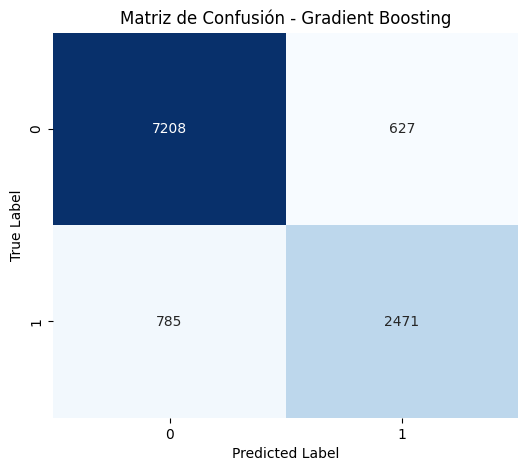

In [232]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matriz de Confusión - Gradient Boosting')
plt.show()

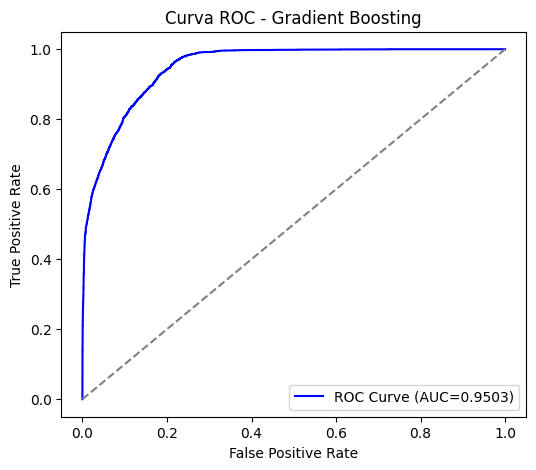

In [233]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_pred_proba):.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Curva ROC - Gradient Boosting')
plt.legend()
plt.show()

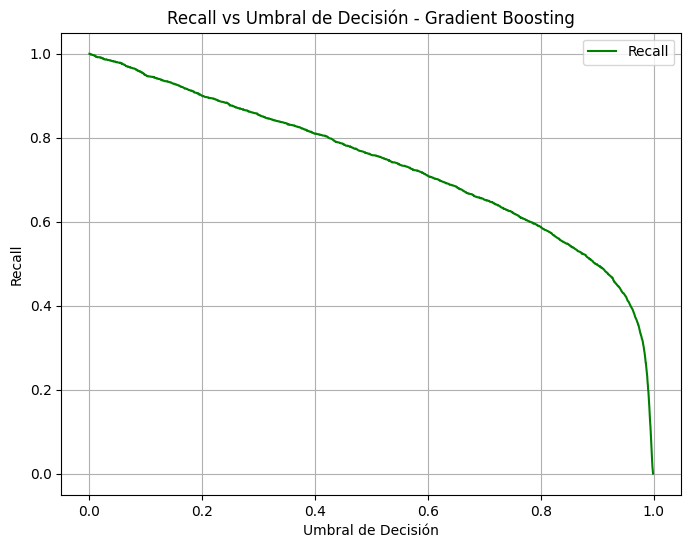

In [234]:
# Obtener probabilidades del modelo seleccionado
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades de clase 1

# Calcular Precision-Recall para diferentes umbrales
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Graficar Recall vs Umbral de Decisión
plt.figure(figsize=(8, 6))
plt.plot(thresholds, recalls[:-1], label='Recall', color='green')
plt.xlabel('Umbral de Decisión')
plt.ylabel('Recall')
plt.title('Recall vs Umbral de Decisión - Gradient Boosting')
plt.grid(True)
plt.legend()
plt.show()

#### Cambio del Umbral Óptimo.

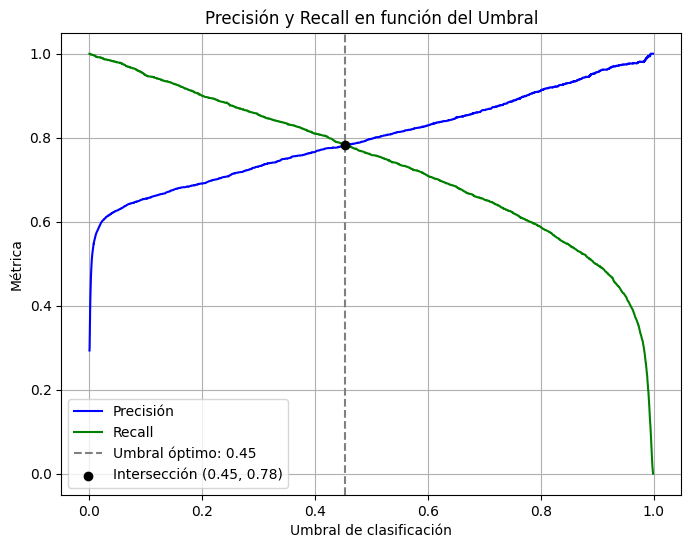

In [235]:
# Obtener probabilidades del modelo.
y_scores = model.predict_proba(X_test)[:, 1]

# Calcular precision, recall y umbrales.
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Encontrar el punto de intersección entre precisión y recall.
diff = np.abs(precision - recall)
min_diff_idx = np.argmin(diff)
optimal_threshold = thresholds[min_diff_idx]
optimal_value = precision[min_diff_idx]

# Graficar Precision-Recall vs Umbral.
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precisión", color='blue')
plt.plot(thresholds, recall[:-1], label="Recall", color='green')
plt.axvline(x=optimal_threshold, linestyle="--", color="gray", label=f"Umbral óptimo: {optimal_threshold:.2f}")
plt.scatter(optimal_threshold, optimal_value, color="black", label=f"Intersección ({optimal_threshold:.2f}, {optimal_value:.2f})", zorder = 5)
plt.xlabel("Umbral de clasificación")
plt.ylabel("Métrica")
plt.grid(True)
plt.legend()
plt.title("Precisión y Recall en función del Umbral")
plt.show()

In [238]:
nuevo_umbral = 0.40
y_pred_new = (y_pred_proba >= nuevo_umbral).astype(int)
print("Classification Report:")
print(classification_report(y_test, y_pred_new))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7835
           1       0.77      0.81      0.79      3256

    accuracy                           0.87     11091
   macro avg       0.84      0.85      0.85     11091
weighted avg       0.87      0.87      0.87     11091



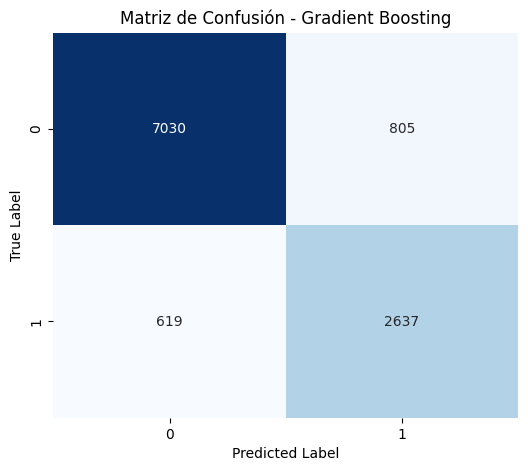

In [239]:
conf_mat = confusion_matrix(y_test, y_pred_new)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Matriz de Confusión - Gradient Boosting')
plt.show()

#### Guardar el modelo.

In [240]:
# Guardar el modelo entrenado.
joblib.dump(model, "models/modelo_gradient_boosting.pkl")
print("Modelo guardado correctamente.")

Modelo guardado correctamente.
